**EDA Part 1**

For further information on the features, please see data dictionary.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

latest_df = pd.read_csv('../big_files/latest_df.csv')
latest_df = latest_df.drop(columns = ['Unnamed: 0'])
latest_df['zone_50m'] = latest_df['zone_50m'].astype('category')
latest_df['zone_200m'] = latest_df['zone_200m'].astype('category')
latest_df['zone_400m'] = latest_df['zone_400m'].astype('category')
latest_df['zone_800m'] = latest_df['zone_800m'].astype('category')
latest_df['zone_1600m'] = latest_df['zone_1600m'].astype('category')
latest_df['zone_2400m'] = latest_df['zone_2400m'].astype('category')
latest_df['good_school'] = latest_df['good_school'].astype('category')
latest_df['tube_zone'] = latest_df['tube_zone'].astype('category')
latest_df.head(1)

,price,date,postcode,prop_type,new_build,est_type,transac,year,month,lsoa,...,satisfaction_pos,ward_code,ward_name,borough,gun_crime,knife_crime,good_school,geometry,tube_zone,any_tube
0,325000,2015-03-17,E3 3AA,F,N,L,A,2015.0,3.0,E01004237,...,85.408471,E05009321,Bromley North,Tower Hamlets,0.0,19.0,1,POINT (537424.9799317715 182853.9898908288),2,1.0


In [50]:
# note it is only health in the deprivation metrics that scores smaller in better areas (see 'processing deprivation notebook')

latest_df = latest_df.rename(columns = {'health_rank_pos': 'health_dep_score'})
latest_df = latest_df.rename(columns = {'employment_dep_score':'employment_rank_pos'})

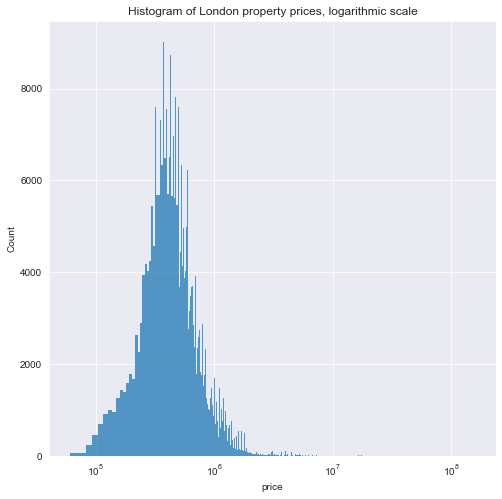

In [10]:
# histogram of price data shows long tail to the right

fig, ax = plt.subplots(figsize = (8,8))
sns.histplot(latest_df['price'], palette = 'Blues')
plt.xscale('log')
plt.title('Histogram of London property prices, logarithmic scale');

''

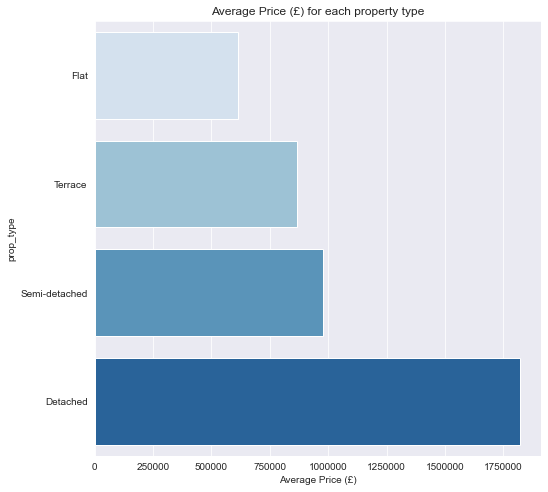

In [11]:
# average prices for the different types of property

fig, ax = plt.subplots(figsize = (8,8))
prop_type_groups = pd.DataFrame(latest_df.groupby('prop_type')['price'].mean()).reset_index().sort_values(by = 'price')
prop_type_groups = prop_type_groups.replace({'D': 'Detached', 'F': 'Flat', 'S': 'Semi-detached', 'T': 'Terrace'})
sns.barplot(x = 'price', y = 'prop_type', data = prop_type_groups, palette = 'Blues', orient = 'h')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Average Price (£)')
plt.title('Average Price (£) for each property type')
;

''

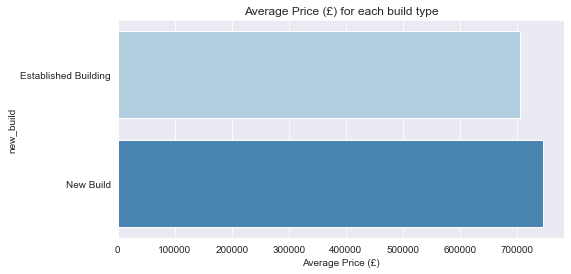

In [12]:
# visualise how average prices depend on build type

fig, ax = plt.subplots(figsize = (8,4))
build_type_groups = pd.DataFrame(latest_df.groupby('new_build')['price'].mean()).reset_index().sort_values(by = 'price')
build_type_groups = build_type_groups.replace({'N': 'Established Building', 'Y': 'New Build'})
sns.barplot(x = 'price', y = 'new_build', data = build_type_groups, palette = 'Blues', orient = 'h')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Average Price (£)')
plt.title('Average Price (£) for each build type')
;

''

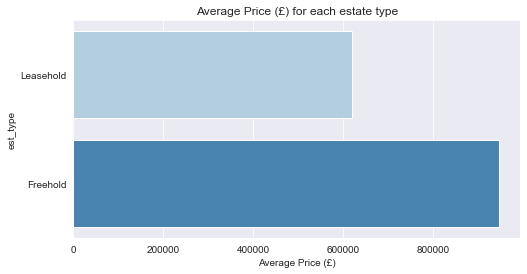

In [13]:
# visualise how average prices depend on estate type (leasehold vs freehold)

fig, ax = plt.subplots(figsize = (8,4))
estate_groups = pd.DataFrame(latest_df.groupby('est_type')['price'].mean()).reset_index().sort_values(by = 'price')
estate_groups = estate_groups.replace({'L': 'Leasehold', 'F': 'Freehold'})
sns.barplot(x = 'price', y = 'est_type', data = estate_groups, palette = 'Blues', orient = 'h')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Average Price (£)')
plt.title('Average Price (£) for each estate type')
;

In [58]:
# freehold / leasehold split along flats vs houses - most flats are leaseholds, the reverse is true for houses

freehold = pd.DataFrame(latest_df.groupby(['est_type', 'prop_type'])['date'].count())
freehold = freehold.rename(columns = {'date': 'count'})
freehold

count
est_type prop_type        
F        D            5313
         F             968
         S           19153
         T           69323
L        D             142
         F          226489
         S             580
         T            3792

''

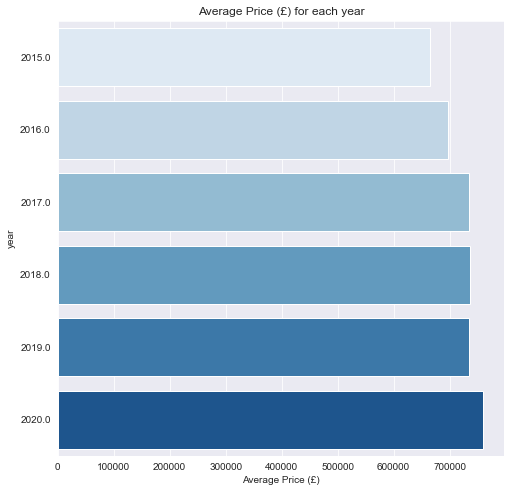

In [14]:
# visualise how average prices depend on the year (prices are generally stable)
# we might consider dropping 2015/2016

fig, ax = plt.subplots(figsize = (8,8))
year_groups = pd.DataFrame(latest_df.groupby('year')['price'].mean()).reset_index().sort_values(by = 'price')
sns.barplot(x = 'price', y = 'year', data = year_groups, palette = 'Blues', orient = 'h')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Average Price (£)')
plt.title('Average Price (£) for each year')
;

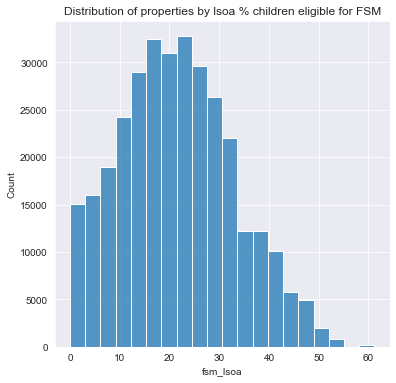

In [15]:
# Visualise free school meals data

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['fsm_lsoa'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by lsoa % children eligible for FSM');

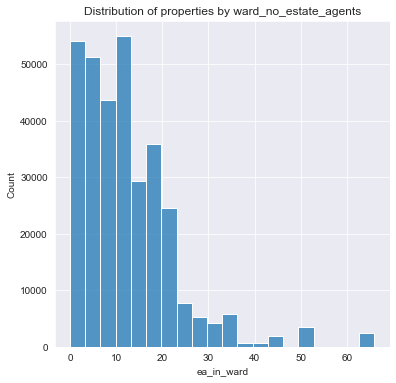

In [16]:
# Visualise estate agents

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['ea_in_ward'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by ward_no_estate_agents');

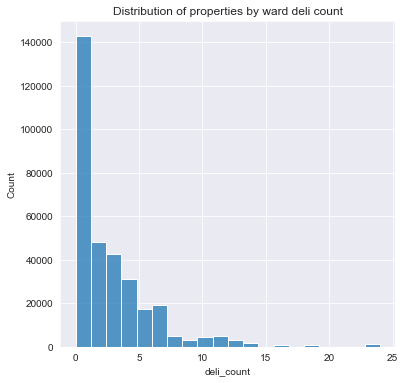

In [17]:
# Visualise delicatessens

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['deli_count'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by ward deli count');

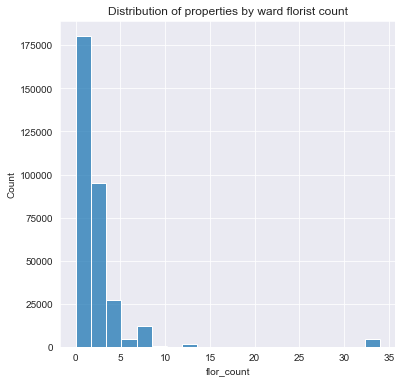

In [18]:
# Visualise florists

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['flor_count'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by ward florist count');

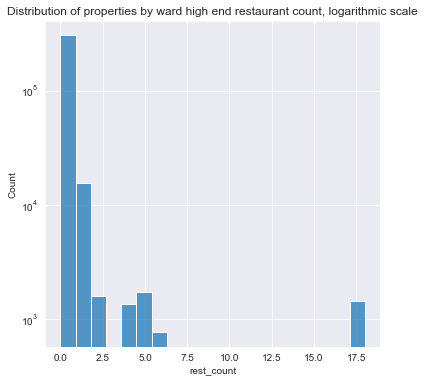

In [19]:
# Visualise smart restaurants

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['rest_count'], palette = 'Blues', bins = 20)
plt.yscale('log')
plt.title('Distribution of properties by ward high end restaurant count, logarithmic scale');

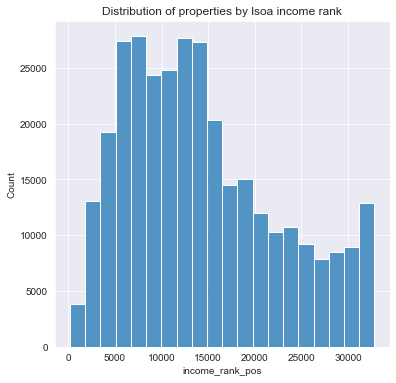

In [20]:
# Visualise income ranking lsoa

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['income_rank_pos'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by lsoa income rank');

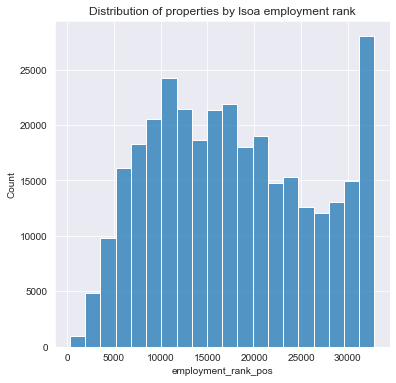

In [51]:
# Visualise deprivation caused by employment problems by lsoa

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['employment_rank_pos'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by lsoa employment rank');

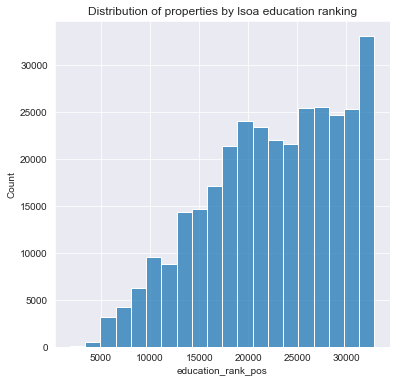

In [22]:
# Visualise deprivation caused by education problems by lsoa

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['education_rank_pos'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by lsoa education ranking');

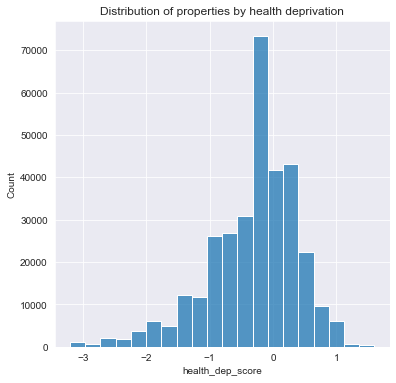

In [31]:
##Visualise deprivation caused by health deprivation

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['health_dep_score'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by health deprivation');

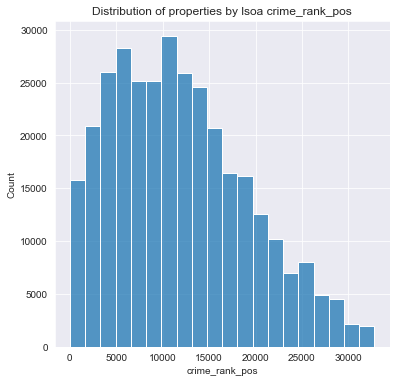

In [33]:
# Visualise deprivation caused by crime

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['crime_rank_pos'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by lsoa crime_rank_pos');

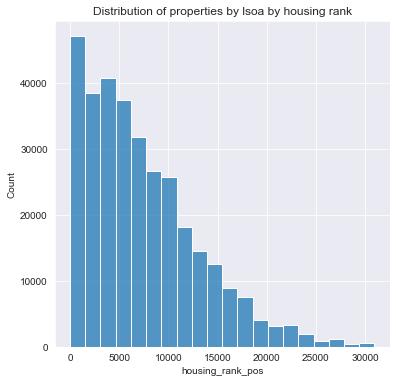

In [34]:
# Visualise deprivation caused by housing barriers

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['housing_rank_pos'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by lsoa by housing rank');

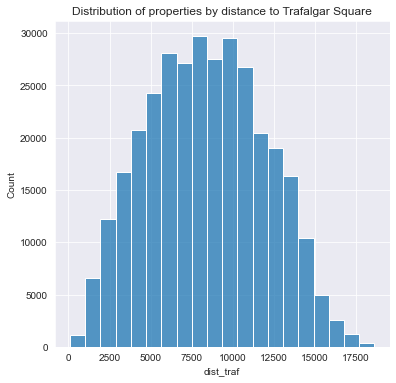

In [35]:
##Visualise distribution of properties straight line distance to Trafalgar Square

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['dist_traf'], palette = 'Blues', bins = 20)
plt.title('Distribution of properties by distance to Trafalgar Square');

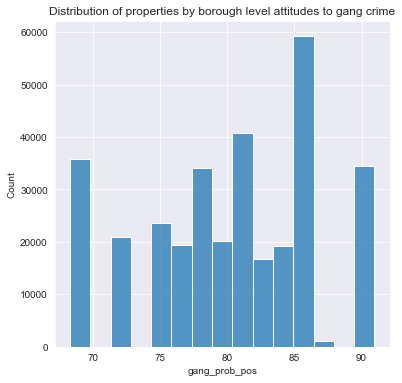

In [37]:
##Visualise distribution of properties by borough level attitudes to gang crime

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['gang_prob_pos'], palette = 'Blues', bins = 15)
plt.title('Distribution of properties by borough level attitudes to gang crime');

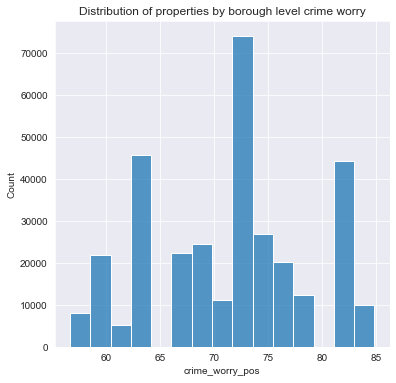

In [38]:
# Visualise distribution of properties by borough level crime worry

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['crime_worry_pos'], palette = 'Blues', bins = 15)
plt.title('Distribution of properties by borough level crime worry');

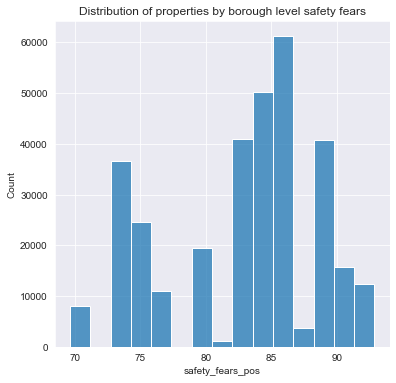

In [39]:
# Visualise distribution of properties by borough level safety fears

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['safety_fears_pos'], palette = 'Blues', bins = 15)
plt.title('Distribution of properties by borough level safety fears');

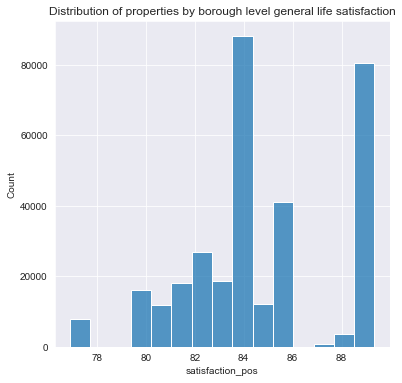

In [41]:
# Visualise distribution of properties by borough level general life satisfaction

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['satisfaction_pos'], palette = 'Blues', bins = 15)
plt.title('Distribution of properties by borough level general life satisfaction');

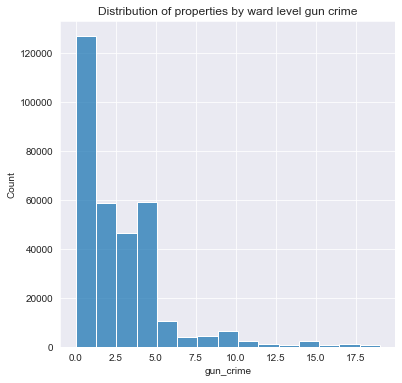

In [42]:
# Visualise distribution of properties by ward level gun crime

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['gun_crime'], palette = 'Blues', bins = 15)
plt.title('Distribution of properties by ward level gun crime');

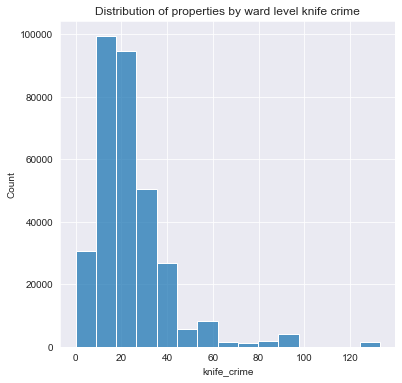

In [44]:
# Visualise distribution of properties by ward level knife crime

fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(latest_df['knife_crime'], palette = 'Blues', bins = 15)
plt.title('Distribution of properties by ward level knife crime');

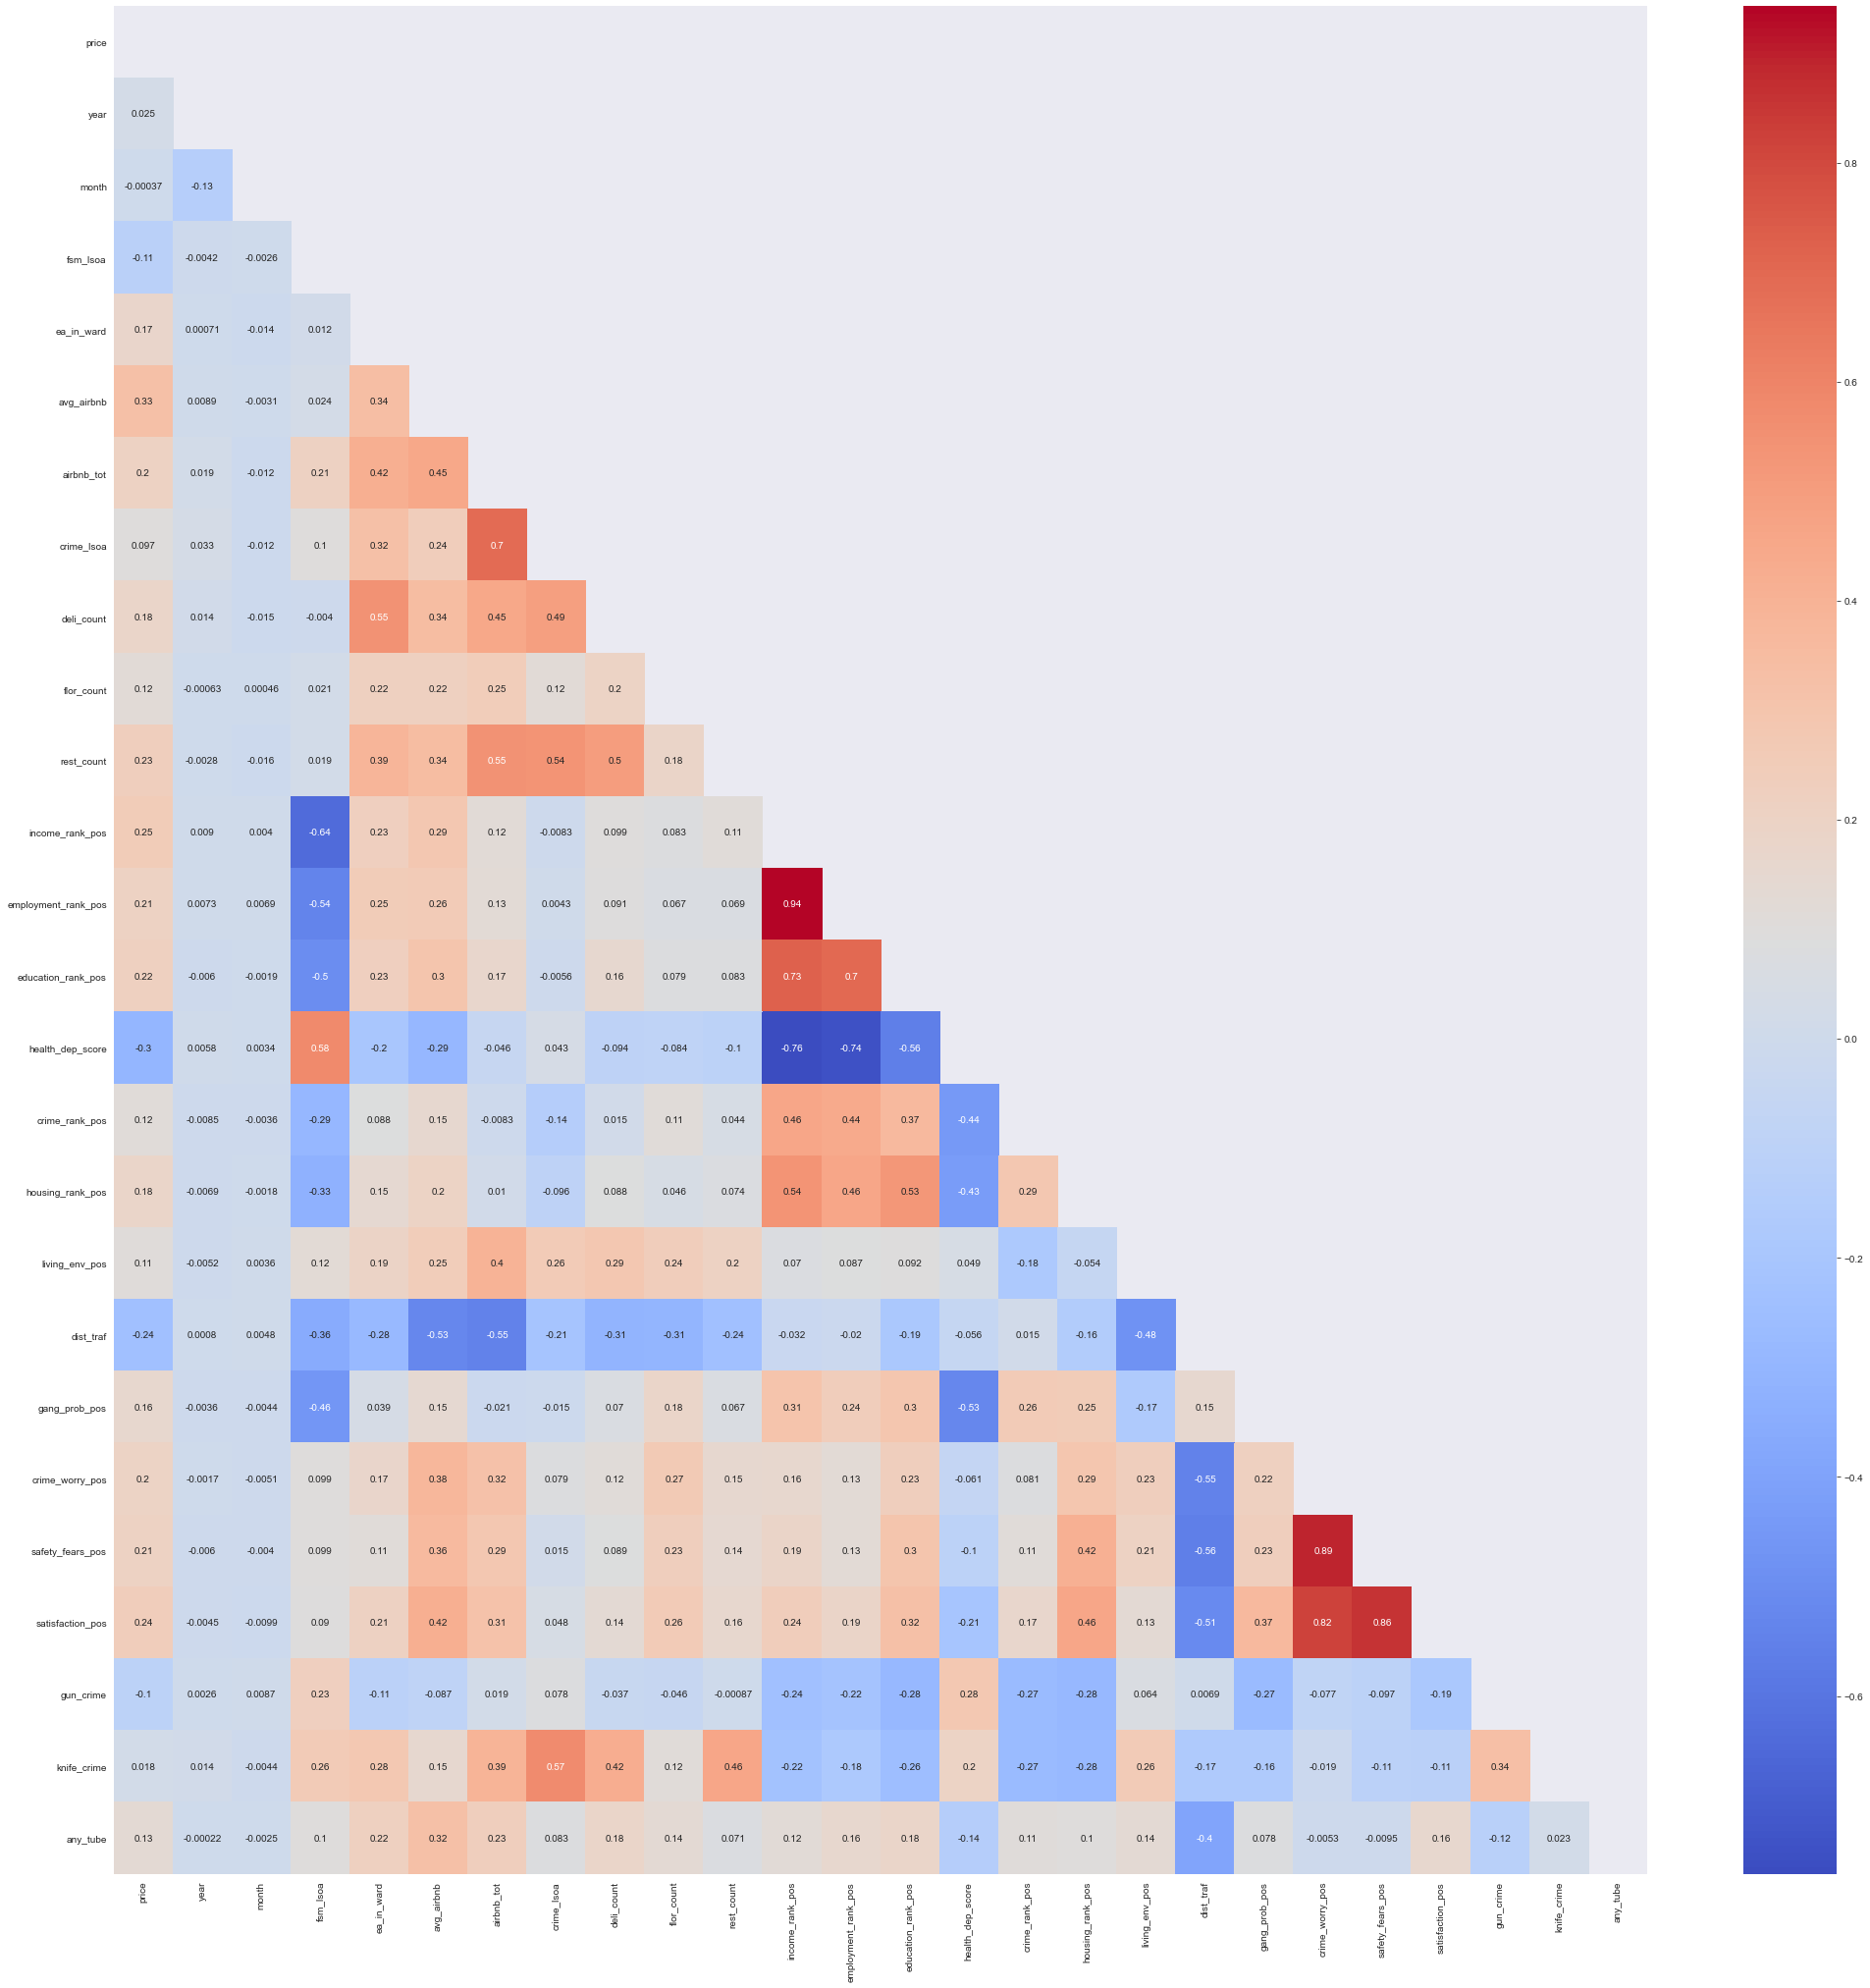

In [52]:
# heatmap to show correlation between numeric features

import numpy as np
fig, ax = plt.subplots(figsize=(35, 35))
mask = np.zeros_like(latest_df.corr(), dtype = bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(latest_df.corr(), mask = mask, annot = True, ax = ax, cmap = 'coolwarm')
plt.show()

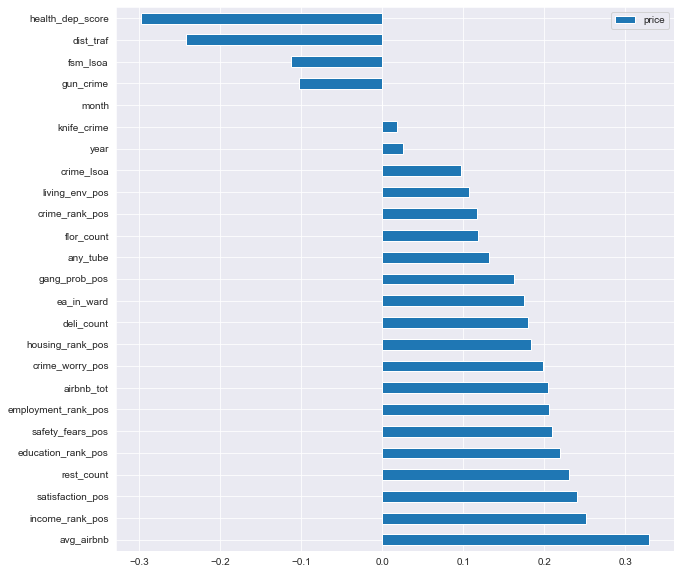

In [53]:
# bar chart to visualise the strength of correlations between predictor variables and target variable

correlations = pd.DataFrame(latest_df.corr()['price'].sort_values(ascending = False)[1:])
fig, ax = plt.subplots(figsize = (10, 10))
correlations.plot(kind = 'barh', ax = ax)
plt.show()

In [54]:
latest_df.to_csv('../../../big_files/latest_df.csv')